In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

#1.Data Loading and basic information
df=pd.read_csv("customer_shopping_data.csv")
print(df.head()) #first 5 rows
print(df.tail()) #last 5 rows
print(df.dtypes) #data types
print(df.shape)  #total row and column

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
      invoice_no customer_id  gender  age         category  quantity    price  \
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food 

In [6]:
#2.Data Cleaning
print(df.isnull().sum) #checking for missing values
#no null or missing values are found

<bound method DataFrame.sum of        invoice_no  customer_id  gender    age  category  quantity  price  \
0           False        False   False  False     False     False  False   
1           False        False   False  False     False     False  False   
2           False        False   False  False     False     False  False   
3           False        False   False  False     False     False  False   
4           False        False   False  False     False     False  False   
...           ...          ...     ...    ...       ...       ...    ...   
99452       False        False   False  False     False     False  False   
99453       False        False   False  False     False     False  False   
99454       False        False   False  False     False     False  False   
99455       False        False   False  False     False     False  False   
99456       False        False   False  False     False     False  False   

       payment_method  invoice_date  shopping_mall  
0  

In [9]:
#3.Descriptive Statistics
print(df.describe()) #Mean,Median(50%),Standard Deviation(std),min,max,Interquartile,count of dataset for numerical values
print("Mode:\n",df[['age','quantity','price']].mode())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000
Mode:
    age  quantity   price
0   37         3  600.16


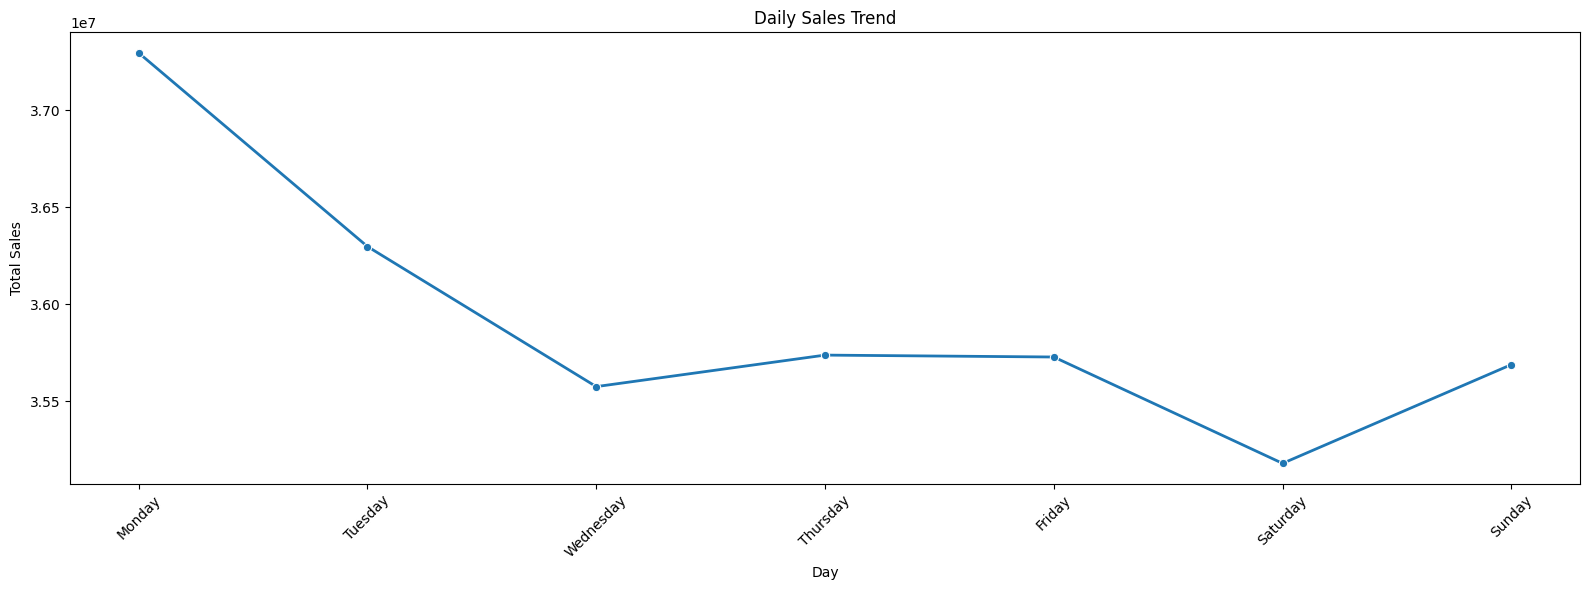

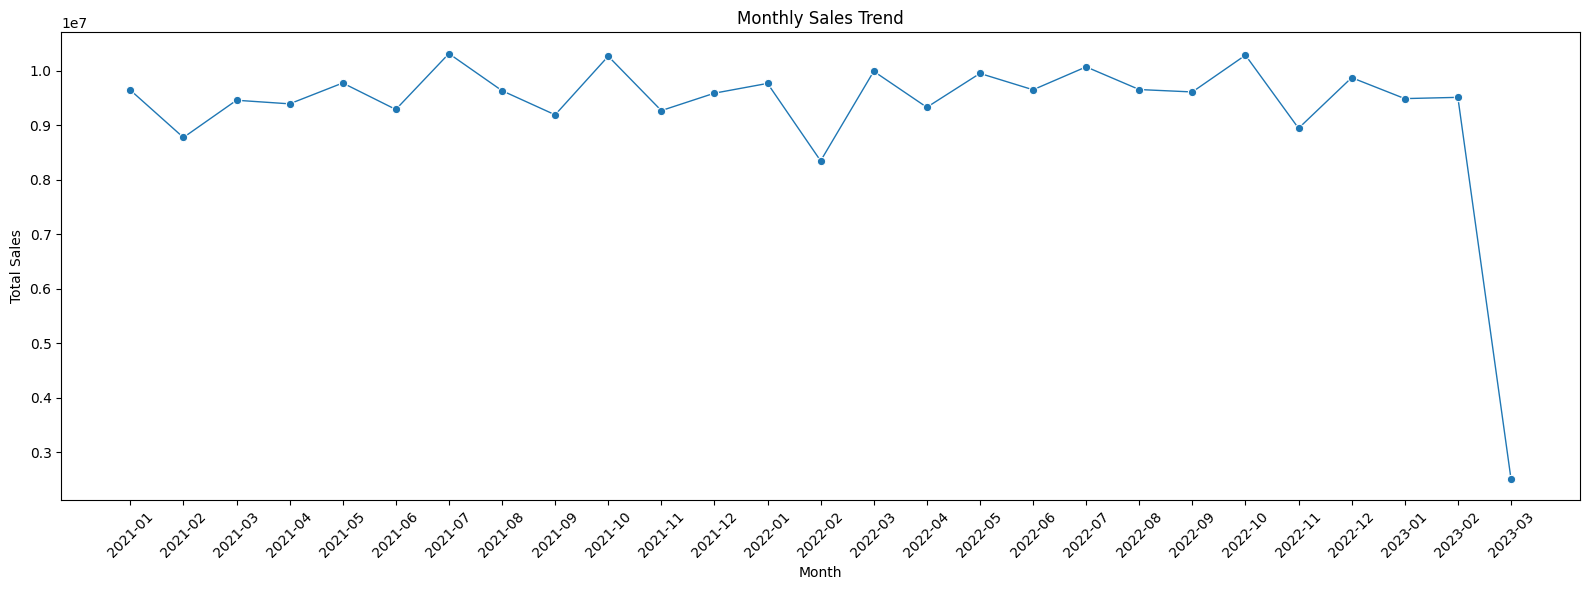

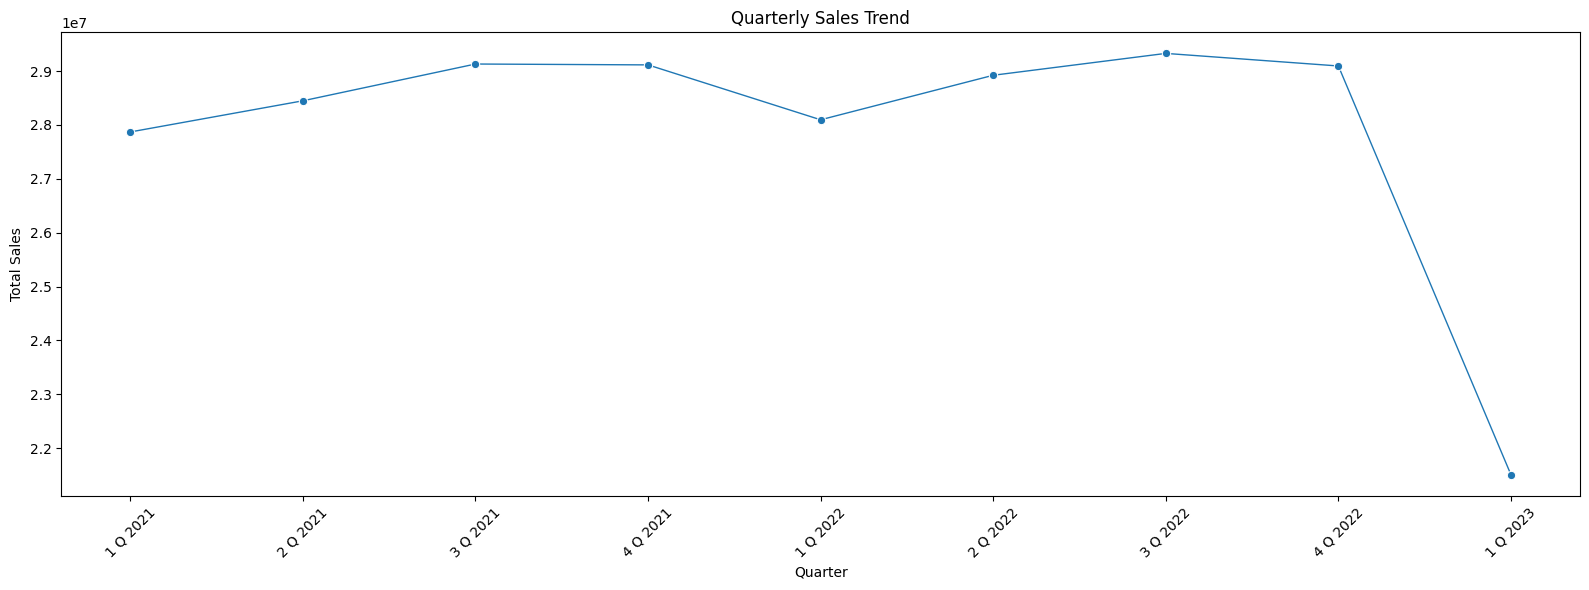

In [20]:
#4.Time Series Analysis
df['invoice_date']=pd.to_datetime(df['invoice_date'], dayfirst=True) #converting date to datetime format

#Additional Time-Based Feature
df['Year']=df['invoice_date'].dt.year
df['Month']=df['invoice_date'].dt.month
df['Day']=df['invoice_date'].dt.day
df['Quarter']=df['invoice_date'].dt.quarter
df['dayofweek']=df['invoice_date'].dt.day_name()

#total sales
df['total_sales']=df['price']*df['quantity']

# Daily sales trend
Dailysales = df.groupby(['dayofweek'])['total_sales'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

#ploting graph for Daily sales 
plt.figure(figsize=(16, 6))
sns.lineplot(x='dayofweek', y='total_sales', data=Dailysales,marker='o',linestyle='-',linewidth=2)
plt.title('Daily Sales Trend')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly sales trend
monthlysales = df.groupby(['Year', 'Month'])['total_sales'].sum().reset_index()
monthlysales['YearMonth'] = monthlysales['Year'].astype(str) + '-' + monthlysales['Month'].astype(str).str.zfill(2)

#ploting graph for monthly sales 
plt.figure(figsize=(16, 6))
sns.lineplot(x='YearMonth', y='total_sales', data=monthlysales, marker='o',markersize=6,linestyle='-',linewidth=1)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quarterly sales trend
quarterlysales = df.groupby(['Year', 'Quarter'])['total_sales'].sum().reset_index()
quarterlysales['YearQuarter'] = quarterlysales['Quarter'].astype(str)  + ' Q ' + quarterlysales['Year'].astype(str)

#ploting graph for Quarterly sales 
plt.figure(figsize=(16, 6))
sns.lineplot(x='YearQuarter', y='total_sales', data=quarterlysales,marker='o',markersize=6,linestyle='-',linewidth=1)
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AgeGroup        category  total_sales
   18-30           Books   173.280602
   18-30        Clothing  3297.054723
   18-30       Cosmetics   447.790041
   18-30 Food & Beverage    58.019833
   18-30           Shoes  6711.061234
   18-30        Souvenir   129.635486
   18-30      Technology 11389.861352
   18-30            Toys   389.583738
   30-45           Books   169.527957
   30-45        Clothing  3266.782746
   30-45       Cosmetics   456.366049
   30-45 Food & Beverage    57.795022
   30-45           Shoes  6765.116240
   30-45        Souvenir   125.990935
   30-45      Technology 11538.874172
   30-45            Toys   393.508065
   45-60           Books   161.648128
   45-60        Clothing  3346.342075
   45-60       Cosmetics   444.658203
   45-60 Food & Beverage    57.789110
   45-60           Shoes  6482.586734
   45-60        Souvenir   128.331687
   45-60      Technology 11697.738693
   45-60            Toys   391.110202
     60+           Books   165.685590
     60+    

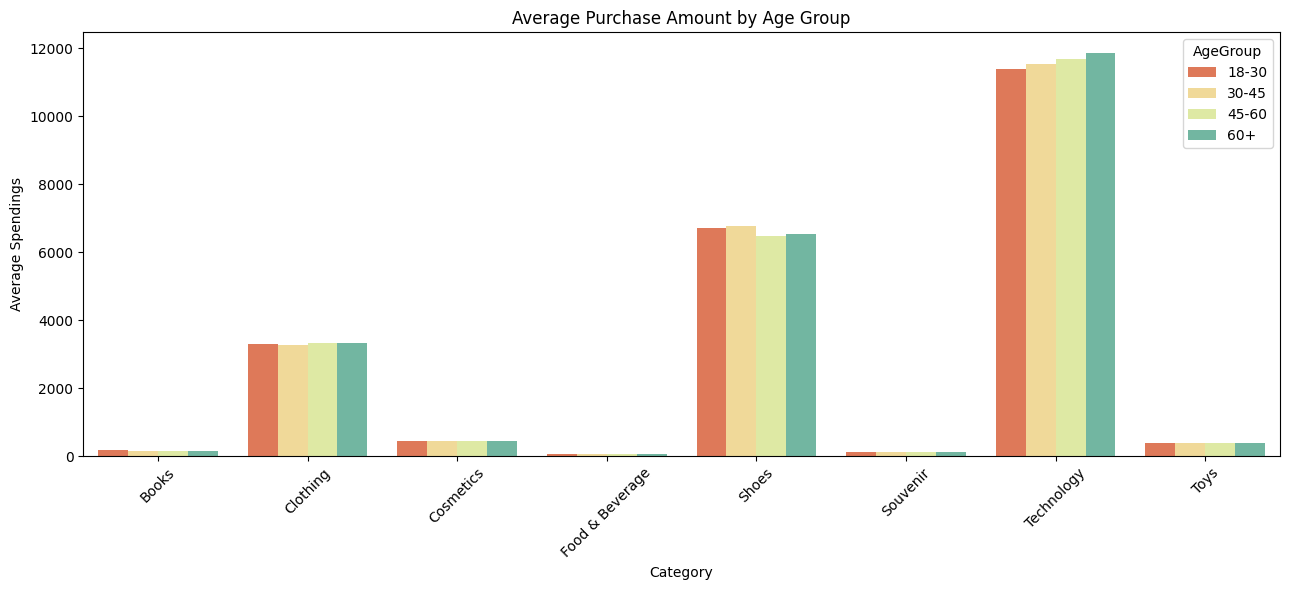

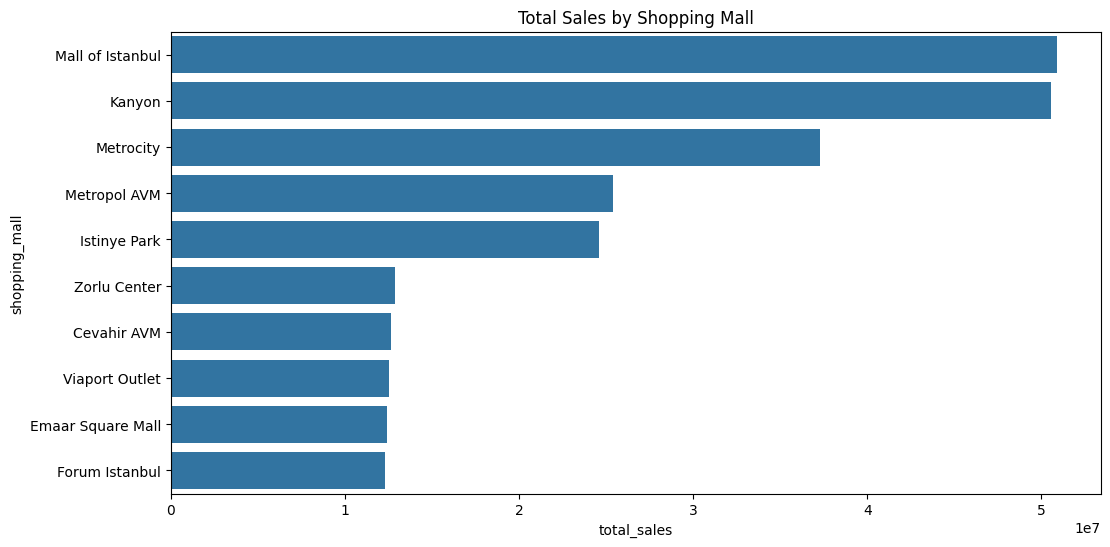

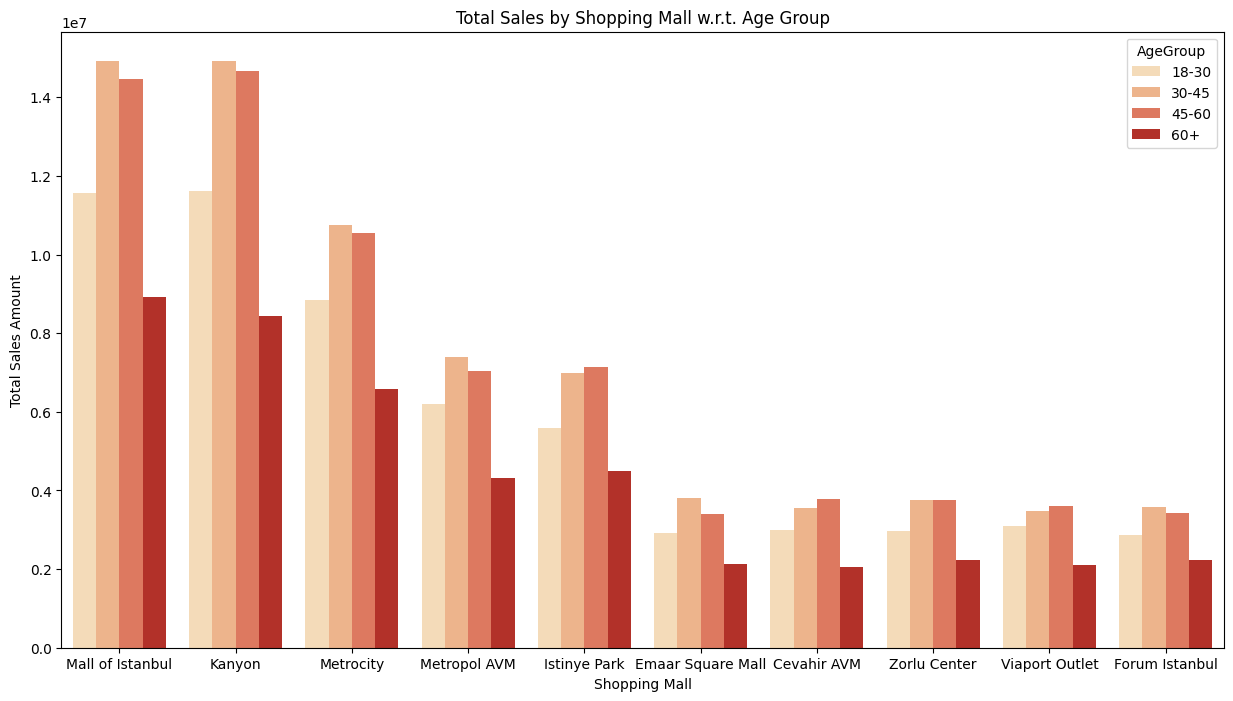

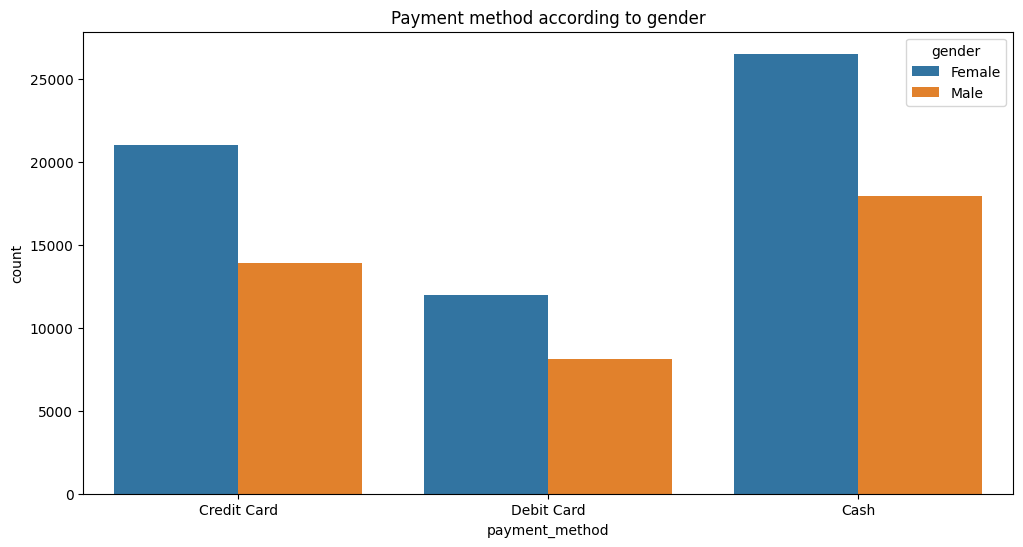


Top spendings by both Age Group

AgeGroup category  total_sales
   45-60 Clothing  33132132.88
   30-45 Clothing  32458753.36
   18-30 Clothing  26640202.16
     60+ Clothing  19686448.32
   30-45    Shoes  19449709.19


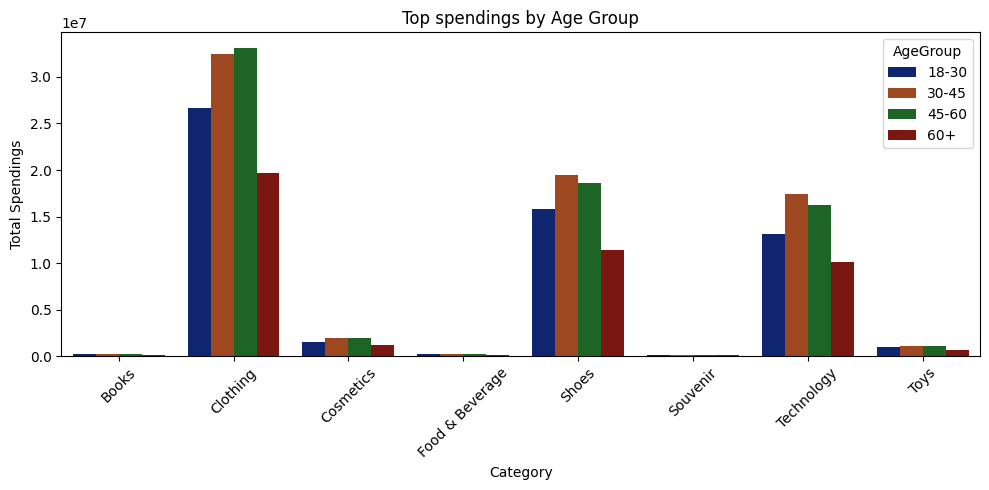


Top spendings by both genders

gender category  total_sales
Female Clothing  68251695.60
  Male Clothing  45745095.44


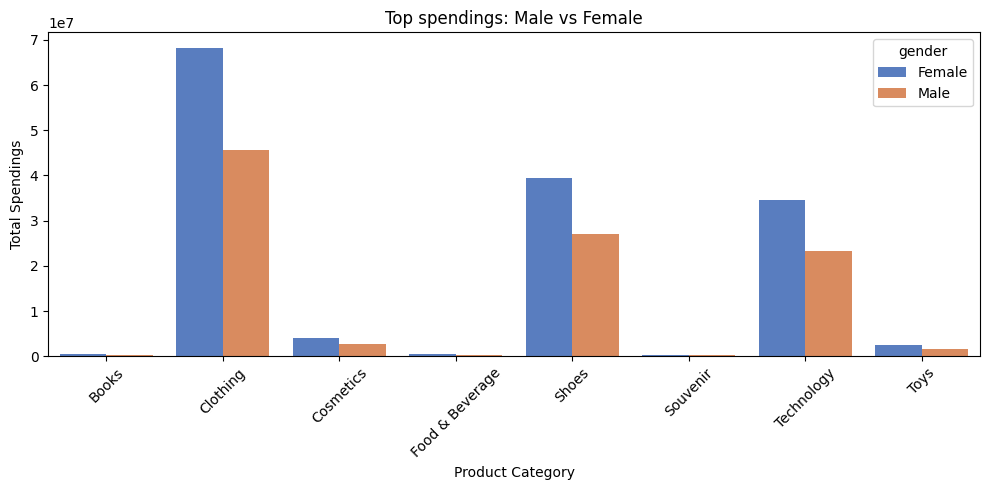

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Cosmetics     6.792863e+06
Toys          3.980426e+06
Name: total_sales, dtype: float64


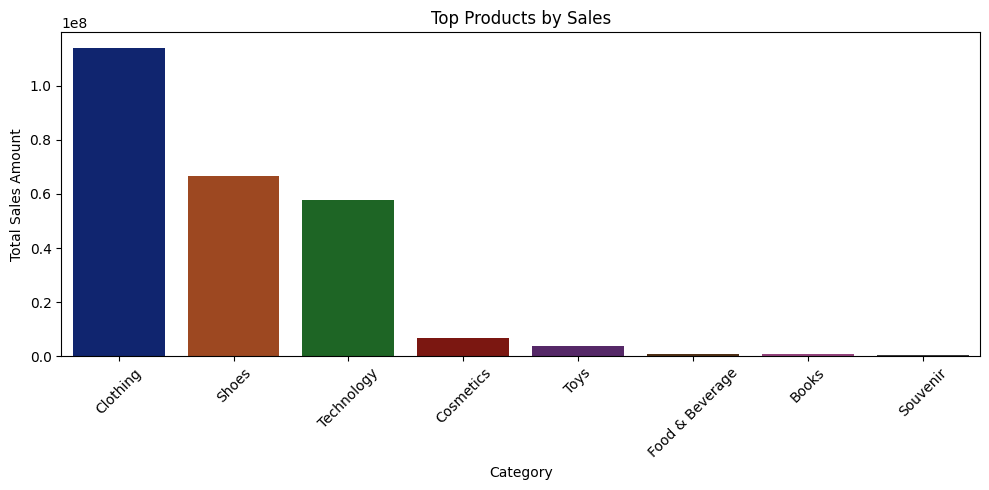

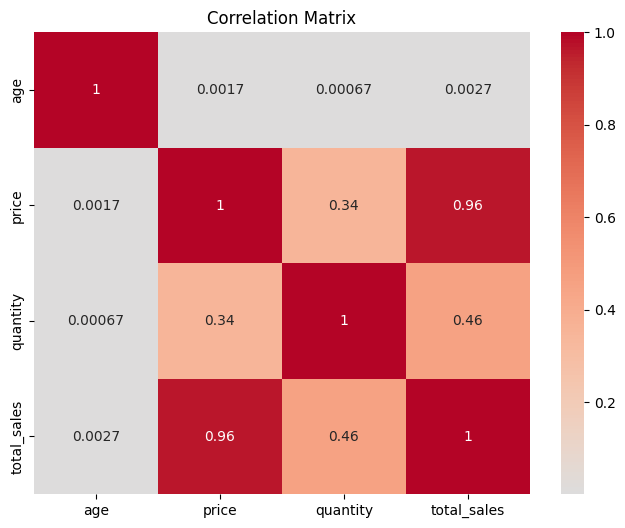

In [48]:
#5.Customer and Product Analysis
# Average purchase amount by age group
bins = [18, 30, 45, 60, 100]
labels = ['18-30', '30-45', '45-60', '60+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels)
purchase_by_age = df.groupby(['AgeGroup','category'],observed=True)['total_sales'].mean().reset_index()
print(purchase_by_age.to_string(index=False))
#graph for average purchase amount
plt.figure(figsize=(13, 6))
sns.barplot(data=purchase_by_age, x='category', y='total_sales',palette='Spectral',hue='AgeGroup')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Category')
plt.ylabel('Average Spendings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by shopping mall
sales_by_mall = df.groupby('shopping_mall')['total_sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_mall, x='total_sales', y='shopping_mall')
plt.title('Total Sales by Shopping Mall')
plt.show()

# Sales by shopping mall with respect to age group
sales_by_age = df.groupby(['shopping_mall','AgeGroup'],observed=True)['total_sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(data=sales_by_age,x='shopping_mall',y='total_sales',hue='AgeGroup',palette='OrRd')
plt.title('Total Sales by Shopping Mall w.r.t. Age Group')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales Amount')
plt.show()

#payment method according to gender
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='payment_method',hue='gender')
plt.title("Payment method according to gender")
plt.show()

#Age,category and Total spending Analysis
age_spending=df.groupby(['AgeGroup','category'],observed=True)['total_sales'].sum().reset_index()
#top spendings by age group
print("\nTop spendings by both Age Group\n")
print(age_spending.sort_values(by='total_sales',ascending=False).head().to_string(index=False))

plt.figure(figsize=(10,5))
sns.barplot(data=age_spending, x='category', y='total_sales', hue='AgeGroup', palette='dark')
plt.title('Top spendings by Age Group')
plt.xlabel('Category')
plt.ylabel('Total Spendings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#gender,product category and Total spending Analysis
gen_spending=df.groupby(['gender','category'])['total_sales'].sum().reset_index()
#top spendings by both genders
print("\nTop spendings by both genders\n")
print(gen_spending.sort_values(by='total_sales',ascending=False).head(2).to_string(index=False))

plt.figure(figsize=(10,5))
sns.barplot(data=gen_spending, x='category', y='total_sales', hue='gender', palette='muted')
plt.title('Top spendings: Male vs Female')
plt.xlabel('Product Category')
plt.ylabel('Total Spendings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#top product by sales
topproduct=df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
print(topproduct.head())

#graph for product analysis
plt.figure(figsize=(10,5))
sns.barplot(x=topproduct.index, y=topproduct.values, palette='dark', hue=topproduct.index,legend=False) #top product
plt.title('Top Products by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#correlation between age,price,quantity,total sales
numeric_cols = ['age','price', 'quantity', 'total_sales']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [3]:
#Recommendations
print("=====Recommendations Based on EDA====\n")
print("1. Run 'Weekday special Offer' on slower sales day to enhance sales as weekend has low sales day.")
print("2. Implement quarterly sales targets with level of achievement bonuses to employee or team to exceed target goals.")
print("4. Run heavily discount sales on some products (which are making less profit or not selling on heavy sales day) to move inventory specially during the off seasons sales.")
print("5. Focus on top products (especially Clothing) with targeted promotions.")
print("6. Increase marketing efforts during high sales months identified in time series analysis.")
print("7. Create age-specific marketing campaigns based on purchasing patterns by age group as identified in 'Top Spending by Age Group' graph.")
print("8. For clothing category,focus on customers aged 45-60 who show higher spending.")
print("9. Thorough supervision on pricing strategy as there's a strong correlation between price and total sales as identified in correlation heatmap.")

=====Recommendations Based on EDA====

1. Run 'Weekday special Offer' on slower sales day to enhance sales as weekend has low sales day.
2. Implement quarterly sales targets with level of achievement bonuses to employee or team to exceed target goals.
4. Run heavily discount sales on some products (which are making less profit or not selling on heavy sales day) to move inventory specially during the off seasons sales.
5. Focus on top products (especially Clothing) with targeted promotions.
6. Increase marketing efforts during high sales months identified in time series analysis.
7. Create age-specific marketing campaigns based on purchasing patterns by age group as identified in 'Top Spending by Age Group' graph.
8. For clothing category,focus on customers aged 45-60 who show higher spending.
9. Thorough supervision on pricing strategy as there's a strong correlation between price and total sales as identified in correlation heatmap.
